## Import 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score

## Load Dataset and Show Data Look like: 

In [2]:
df = pd.read_csv("data/train.csv")


### 1) Any missing value in Dataset ?

In [3]:
df.isnull().sum()
df.dropna(inplace=True)

In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

#now this dataset no have missing value so i have going on **preprosseing**.

### 2) How big the data ?¶

In [5]:
df.shape

(404287, 6)

### 3) How dose the data look like ?

In [6]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
299310,299310,421937,148222,What was the last lie you told?,What was the first lie you told your parents?,0
316593,316593,441678,109371,How many of you think Gandhiji may have smoked...,Has Adrian Lamo ever smoked marijuana? What ar...,0
158004,158004,91148,246915,What are Quora credits?,What is Quora credit?,1
114469,114469,186846,186847,How do I make girl like me who says I hates yo...,Data science opportunity Canada?,0
169500,169500,8462,20542,How do I improve my pronunciation in English?,How can I improve fluency in English?,1


### 4) what is the data type of columns?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [9]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

###  5) How dose the data look mathemetically ?

In [10]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404287.000000,404287.000000,404287.000000,404287.000000
mean,202144.340337,217243.151093,220955.212082,0.369201
std,116708.673691,157751.614317,159903.168488,0.482589
min,0.000000,1.000000,2.000000,0.000000
25%,101071.500000,74436.500000,74726.500000,0.000000
50%,202145.000000,192181.000000,197053.000000,0.000000
75%,303216.500000,346573.000000,354692.000000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


### 6) Are there duplicate vaules ?

In [11]:
df.duplicated().sum()

0

### 7) How is the corrcation between columns ?

In [12]:
df.corr()

,id,qid1,qid2,is_duplicate
id,1.000000,0.629371,0.641991,-0.008783
qid1,0.629371,1.000000,0.700138,-0.247070
qid2,0.641991,0.700138,1.000000,-0.260101
is_duplicate,-0.008783,-0.247070,-0.260101,1.000000


## Data visualization: 

0    255024
1    149263
Name: is_duplicate, dtype: int64
0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64


<AxesSubplot:>

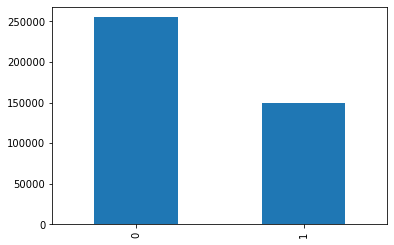

In [13]:
    # Distribution of dublicate and non-dublicate QueationL
print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)

    #visualization:
df["is_duplicate"].value_counts().plot(kind="bar")

Number of unique Queation : 537929
Number of queation getting repeated: 111778


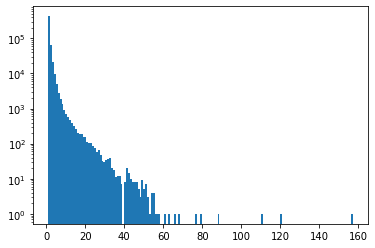

In [14]:
    # Repeated Queation:
qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print("Number of unique Queation :",np.unique(qid).shape[0])

x = qid.value_counts()>1
print("Number of queation getting repeated:",x[x].shape[0])

    # Repeated queation visualization
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

In [15]:
new_df = df.sample(100000)

In [16]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.duplicated().sum()

0

In [18]:
ques_df = new_df[["question1","question2"]]
ques_df.head()

,question1,question2
299569,Where can I get an html editor with live previ...,Where can I learn building an image editor?
247925,Is there life after death?,Can we ever know if there is life after death?
69076,Should people have the right to take their own...,Should a person have a right to end their own ...
275104,What are the good things done by the British t...,What did Hitler think of India and Indian people?
278812,Which is the toughest trek in Maharashtra?,How is Makalidurga Trek near Bangalore?


In [19]:
ques_df.shape

(100000, 2)

## Text Preprocessing 

In [20]:
    #Merge texts:
questions = list(ques_df["question1"]) + list(ques_df["question2"])

cv = CountVectorizer(max_features=3000)
q1_arr , q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [21]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

temp_df.shape

(100000, 6000)

In [22]:
temp_df["is_duplicate"] = new_df["is_duplicate"]

In [23]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
299569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
69076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
275104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Spliting Data:

In [24]:
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,
                                                 test_size=0.2,
                                                 random_state=1)


In [25]:
print("X_train Review Shape:",X_train.shape)
print("X_test Review Shape:",X_test.shape)
print("y_train Review label Shape",y_train.shape)
print("y_test Review label Shape",y_test.shape)

X_train Review Shape: (80000, 6000)
X_test Review Shape: (20000, 6000)
y_train Review label Shape (80000,)
y_test Review label Shape (20000,)


## Making machine learning Training Model:

In [26]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.76795

In [27]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)


0.7356